### Creating a new graph to show the NLL and dimensions for different alphas 

In [1]:
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns


In [3]:
model_data = pd.read_csv("../results/model_results.csv")
model_data

,dimension,type,model,group,sum_NLL,mean_beta_semantic,mean_beta_freq,mean_beta_phon
0,50,alpha_0_s2v,Dynamic/Simdrop,NH,3488.038621,3.919815,8.013673,NaN
1,50,alpha_0_s2v,Dynamic/Simdrop,CI,2927.475000,4.581609,8.690506,NaN
2,50,alpha_0_w2v,Dynamic/Simdrop,NH,3495.317287,3.838401,8.139141,NaN
3,50,alpha_0_w2v,Dynamic/Simdrop,CI,2921.399968,4.555132,8.813831,NaN
4,50,alpha_0.1_s2v,Dynamic/Simdrop,NH,3486.613874,3.935488,8.015492,NaN
...,...,...,...,...,...,...,...,...
195,300,average,Dynamic/Simdrop,CI,2980.399314,2.481947,9.044614,NaN
196,300,only_s2v,Dynamic/Simdrop,NH,3526.465137,2.300483,8.692809,NaN
197,300,only_s2v,Dynamic/Simdrop,CI,2991.689686,2.390974,9.459983,NaN
198,300,only_w2v,Dynamic/Simdrop,NH,3520.718179,2.285279,8.120455,NaN


{'average': 'green', 'only_s2v': 'blue', 'only_w2v': 'red', 'alpha_0_s2v': 'purple', 'alpha_0_w2v': 'orange', 'alpha_0.1_s2v': 'purple', 'alpha_0.1_w2v': 'orange', 'alpha_0.2_s2v': 'purple', 'alpha_0.2_w2v': 'orange', 'alpha_0.3_s2v': 'purple', 'alpha_0.3_w2v': 'orange', 'alpha_0.4_s2v': 'purple', 'alpha_0.4_w2v': 'orange', 'alpha_0.5_s2v': 'purple', 'alpha_0.5_w2v': 'orange', 'alpha_0.6_s2v': 'purple', 'alpha_0.6_w2v': 'orange', 'alpha_0.7_s2v': 'purple', 'alpha_0.7_w2v': 'orange', 'alpha_0.8_s2v': 'purple', 'alpha_0.8_w2v': 'orange', 'alpha_0.9_s2v': 'purple', 'alpha_0.9_w2v': 'orange', 'alpha_1.0_s2v': 'purple', 'alpha_1.0_w2v': 'orange'}


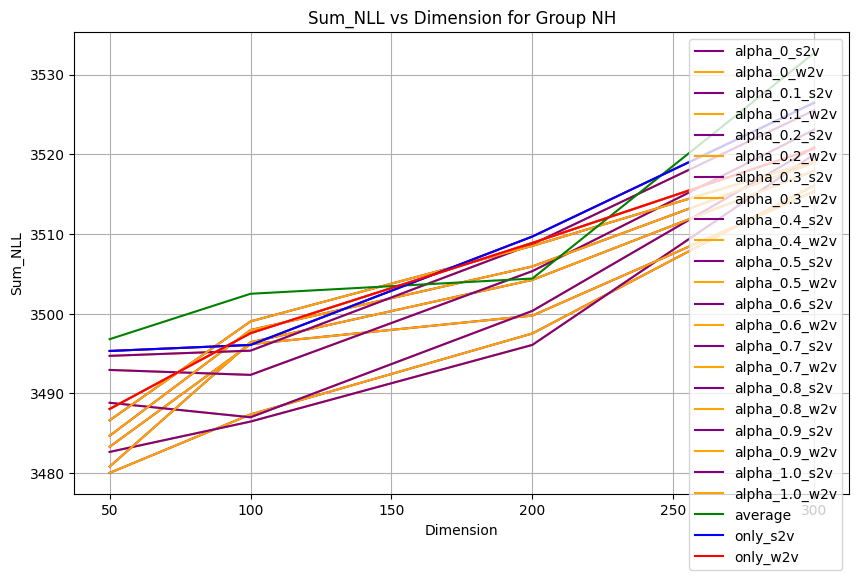

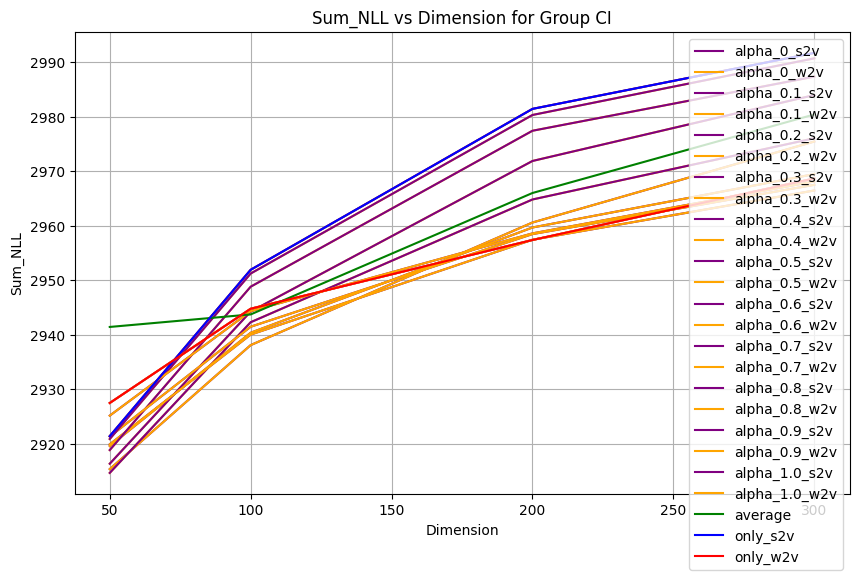

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
df = pd.read_csv('../results/model_results.csv')  # Replace 'your_file.xlsx' with your file path

# Define the color map
color_map = {
    'average': 'green',
    'only_s2v': 'blue',
    'only_w2v': 'red'
}
# Default colors for other types
default_colors = {
    's2v': 'purple',  # Replace 'lightpurple' with the actual color you want
    'w2v': 'orange'
}

# Add colors for alpha types
for alpha in ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']:
    color_map[f'alpha_{alpha}_s2v'] = default_colors['s2v']
    color_map[f'alpha_{alpha}_w2v'] = default_colors['w2v']

print(color_map)

# Step 2: Filter and plot for each group
for group in ['NH', 'CI']:
    # Filter the DataFrame for the current group
    group_df = df[df['group'] == group]

    # Step 3: Plotting
    plt.figure(figsize=(10, 6))
    for type_ in group_df['type'].unique():
        # Filter the DataFrame for the current type
        type_df = group_df[group_df['type'] == type_]

        # Sort values by 'dimension' to ensure lines are plotted correctly
        type_df = type_df.sort_values(by='dimension')

        # Get the color for the type
        color = color_map.get(type_, 'black')  # Default to black if type not in color_map

        # Plotting each type as a separate line
        plt.plot(type_df['dimension'], type_df['sum_NLL'], label=type_, color=color)

    plt.title(f'Sum_NLL vs Dimension for Group {group}')
    plt.xlabel('Dimension')
    plt.ylabel('Sum_NLL')
    plt.legend()
    plt.grid(True)
    if group == "NH": 
        plt.savefig("../plots/Q3/NH-Dynamic-Full")
    if group == 'CI': 
        plt.savefig("../plots/Q3/CI-Dynamic-Full")
    plt.show()


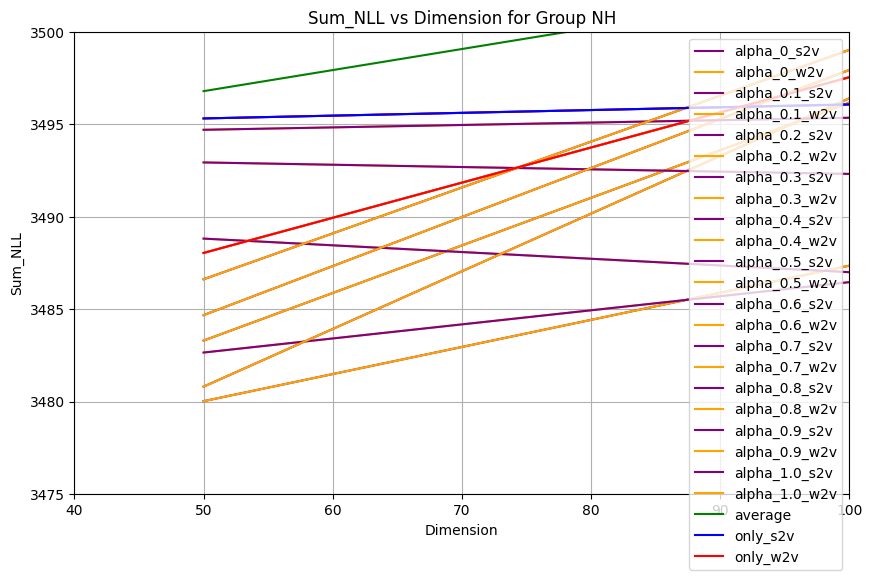

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
df = pd.read_csv('../results/model_results.csv')  # Replace 'your_file.xlsx' with your file path

# Define the color for each type pattern
def get_color(type_):
    if type_ == 'average':
        return 'green'
    elif type_ == 'only_s2v':
        return 'blue'
    elif type_ == 'only_w2v':
        return 'red'
    elif 's2v' in type_:
        return 'purple'  # Replace 'lightpurple' with the actual color code or name
    elif 'w2v' in type_:
        return 'orange'
    else:
        return 'black'  # Default color

# Step 2: Filter and plot for each group
for group in ['NH']:
    # Filter the DataFrame for the current group
    group_df = df[df['group'] == group]

    # Step 3: Plotting
    plt.figure(figsize=(10, 6))
    for type_ in group_df['type'].unique():
        # Filter the DataFrame for the current type
        type_df = group_df[group_df['type'] == type_]

        # Sort values by 'dimension' to ensure lines are plotted correctly
        type_df = type_df.sort_values(by='dimension')

        # Get the color for the type
        color = get_color(type_)

        # Plotting each type as a separate line
        plt.plot(type_df['dimension'], type_df['sum_NLL'], label=type_, color=color)

    plt.title(f'Sum_NLL vs Dimension for Group {group}')
    plt.xlabel('Dimension')
    plt.ylabel('Sum_NLL')
    plt.legend()
    plt.grid(True)
    plt.xlim(40, 100)  # Set x-axis limits
    plt.ylim(3475, 3500)  # Set y-axis limits
    plt.savefig("../plots/Q3/NH-Dynamic-Modified")
    plt.show()


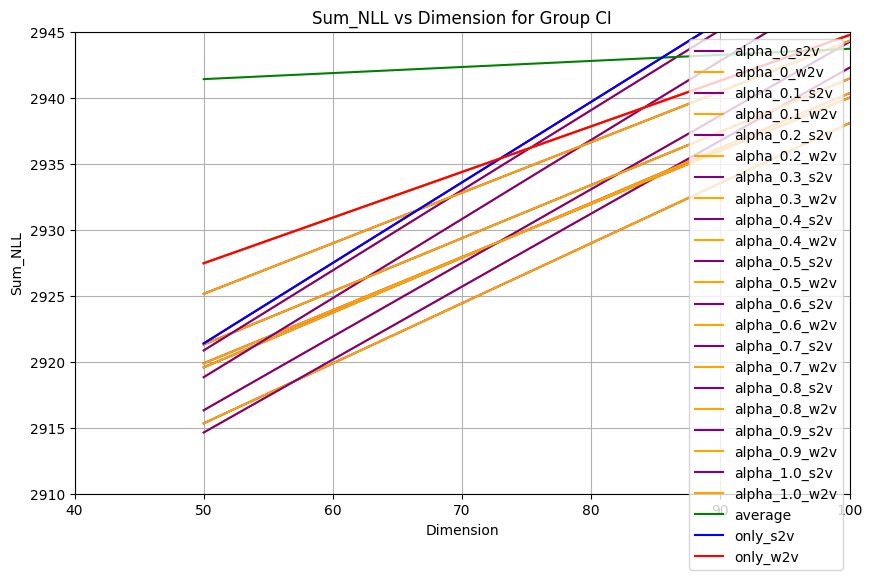

In [19]:
for group in ['CI']:
    # Filter the DataFrame for the current group
    group_df = df[df['group'] == group]

    # Step 3: Plotting
    plt.figure(figsize=(10, 6))
    for type_ in group_df['type'].unique():
        # Filter the DataFrame for the current type
        type_df = group_df[group_df['type'] == type_]

        # Sort values by 'dimension' to ensure lines are plotted correctly
        type_df = type_df.sort_values(by='dimension')

        # Get the color for the type
        color = get_color(type_)

        # Plotting each type as a separate line
        plt.plot(type_df['dimension'], type_df['sum_NLL'], label=type_, color=color)

    plt.title(f'Sum_NLL vs Dimension for Group {group}')
    plt.xlabel('Dimension')
    plt.ylabel('Sum_NLL')
    plt.legend()
    plt.grid(True)
    plt.xlim(40, 100)  # Set x-axis limits
    plt.ylim(2910, 2945)  # Set y-axis limits
    plt.savefig("../plots/Q3/CI-Dynamic-Modified")
    plt.show()